# WeatherPy
----



In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# Import API key
from api_keys import weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# Output File (CSV)
output_data_file = "../output_data/cities_weather.csv"
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)


608

### Perform API Calls


In [4]:
#Lists
cityList = []
lat = []
long = []
maxTemp = []
humid = []
cloud = []
wind = []
country = []
date = []
x = 0
#API calls
for city in cities:
    
    url = "http://api.openweathermap.org/data/2.5/weather?"
    units = "imperial"

    query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

    response = requests.get(query_url)
    weatherData = response.json()
    
    try:
        cityList.append(weatherData['name'])
        print(f"Processing Record {x} | {weatherData['name']}")
        x += 1
    except:
        print('City not found. Skipping...')
    try:
        lat.append(weatherData['coord']['lat'])
    except:
        lat.append(np.nan)
    try:
        long.append(weatherData['coord']['lon'])
    except:
        long.append(np.nan)
    try:
        maxTemp.append(weatherData['main']['temp_max'])
    except:
        maxTemp.append(np.nan)
    try:
        humid.append(weatherData['main']['humidity'])
    except:
        humid.append(np.nan)
    try:
        cloud.append(weatherData['clouds']['all'])
    except:
        cloud.append(np.nan)
    try:
        wind.append(weatherData['wind']['speed'])
    except:
        wind.append(np.nan)
    try:
        country.append(weatherData['sys']['country'])
    except:
        country.append(np.nan)
    try:
        date.append(weatherData['dt'])
    except:
        date.append(np.nan)
    
    

        
        
        
        
      
        
           
          



Processing Record 0 | Port Elizabeth
Processing Record 1 | Yellowknife
Processing Record 2 | Saint Paul Harbor
Processing Record 3 | Itoman
Processing Record 4 | Kapaa
City not found. Skipping...
Processing Record 5 | Port Alfred
Processing Record 6 | Surgut
Processing Record 7 | Lebu
Processing Record 8 | Vaini
Processing Record 9 | Punta Arenas
Processing Record 10 | Berdigestyakh
Processing Record 11 | Vostok
Processing Record 12 | Rikitea
Processing Record 13 | Hithadhoo
City not found. Skipping...
Processing Record 14 | Kyabé
Processing Record 15 | Russell
Processing Record 16 | Hilo
Processing Record 17 | Qaanaaq
Processing Record 18 | Potot
Processing Record 19 | Hermanus
Processing Record 20 | Airai
City not found. Skipping...
Processing Record 21 | Castro
Processing Record 22 | Dikson
Processing Record 23 | Prince Rupert
Processing Record 24 | Ushuaia
Processing Record 25 | Tuatapere
Processing Record 26 | Burns Lake
Processing Record 27 | Kahului
Processing Record 28 | São Jo

Processing Record 230 | Beyneu
Processing Record 231 | Ruteng
Processing Record 232 | Dingle
Processing Record 233 | Abnūb
Processing Record 234 | Port Blair
Processing Record 235 | Lüderitz
Processing Record 236 | Hualmay
Processing Record 237 | Bambanglipuro
Processing Record 238 | Zhezkazgan
Processing Record 239 | Huanren
Processing Record 240 | Puri
Processing Record 241 | Seoul
Processing Record 242 | Ubari
Processing Record 243 | Chorozinho
Processing Record 244 | Karwar
Processing Record 245 | Vysokogornyy
Processing Record 246 | Klaksvík
Processing Record 247 | Ponta do Sol
Processing Record 248 | Shubarkuduk
Processing Record 249 | Shimanovsk
Processing Record 250 | Codrington
Processing Record 251 | Erdaojiang
Processing Record 252 | Taoudenni
Processing Record 253 | Ukiah
Processing Record 254 | Sambava
Processing Record 255 | Pangody
Processing Record 256 | Bilibino
Processing Record 257 | Caravelas
Processing Record 258 | Craig
Processing Record 259 | Charcas
Processing R

Processing Record 458 | Peniche
Processing Record 459 | Baykit
Processing Record 460 | Ixtapa
Processing Record 461 | Killybegs
Processing Record 462 | Dickinson
Processing Record 463 | São João da Barra
Processing Record 464 | Zaozyornoye
City not found. Skipping...
Processing Record 465 | Dawlatabad
Processing Record 466 | Shestakovo
Processing Record 467 | Angoche
Processing Record 468 | Brae
Processing Record 469 | Ranong
Processing Record 470 | Mount Gambier
Processing Record 471 | Rosarito
Processing Record 472 | Liwale
Processing Record 473 | Maltahöhe
Processing Record 474 | Cooma
City not found. Skipping...
Processing Record 475 | Walvis Bay
Processing Record 476 | Pidhorodne
Processing Record 477 | Grandview
Processing Record 478 | Wau
Processing Record 479 | Pacific Grove
Processing Record 480 | Umluj
Processing Record 481 | Caraz
Processing Record 482 | Oranjemund
Processing Record 483 | Sault Ste. Marie
Processing Record 484 | Anadyr
Processing Record 485 | Tazmalt
Process

In [6]:
#Creates Weather Dataframe
weatherDict = {
    'City' : cities,
    'Latitude' : lat,
    'Longitude' : long,
    'Maximum_Temp' : maxTemp,
    'Humidity' : humid,
    'Cloudiness' : cloud,
    'Wind_Speed' : wind,
    'Country' : country,
    'Date' : date
}

weatherDf = pd.DataFrame(weatherDict)




In [7]:
#Print to CSV
weatherDf.to_csv(output_data_file,index=False)



In [8]:
weatherDf

,City,Latitude,Longitude,Maximum_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,port elizabeth,-33.9180,25.5701,52.09,66.0,0.0,6.91,ZA,1.627772e+09
1,yellowknife,62.4560,-114.3525,82.92,44.0,20.0,11.50,CA,1.627772e+09
2,kodiak,57.7900,-152.4072,57.11,83.0,99.0,8.08,US,1.627772e+09
3,itoman,26.1247,127.6694,82.78,96.0,75.0,16.11,JP,1.627772e+09
4,kapaa,22.0752,-159.3190,86.32,67.0,20.0,3.00,US,1.627772e+09
...,...,...,...,...,...,...,...,...,...
603,beloha,-25.1667,45.0500,63.18,75.0,0.0,11.32,MG,1.627772e+09
604,salinopolis,-0.6136,-47.3561,77.43,86.0,31.0,11.65,BR,1.627772e+09
605,pilar,-9.5972,-35.9567,75.13,94.0,18.0,7.45,BR,1.627772e+09
606,huron,41.1501,-82.5499,77.68,79.0,69.0,5.03,US,1.627772e+09


In [9]:
weatherDf.describe()

,Latitude,Longitude,Maximum_Temp,Humidity,Cloudiness,Wind_Speed,Date
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,5.550000e+02
mean,20.147782,19.764372,69.313063,70.268468,53.711712,7.524342,1.627772e+09
std,33.689819,90.316492,14.193976,21.892047,37.959599,5.374279,9.962025e+01
min,-54.800000,-179.166700,34.360000,11.000000,0.000000,0.000000,1.627772e+09
25%,-7.897350,-58.693500,57.930000,57.000000,19.000000,3.440000,1.627772e+09
50%,22.678300,24.662200,71.060000,76.000000,57.000000,5.990000,1.627772e+09
75%,49.497300,100.335400,79.600000,87.000000,93.000000,10.245000,1.627772e+09
max,78.218600,178.416700,106.520000,100.000000,100.000000,28.920000,1.627772e+09


## Latitude vs. Temperature Plot

<IPython.core.display.Javascript object>


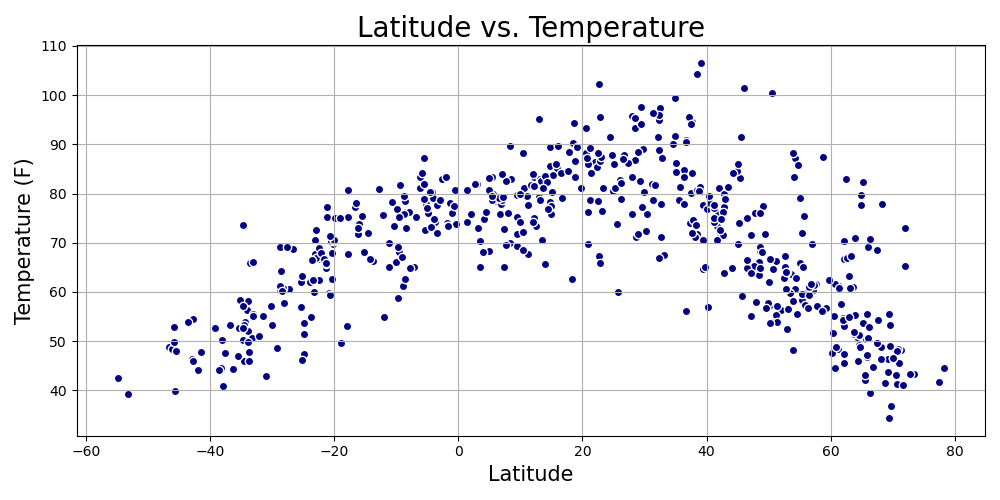

In [10]:
plt.figure(figsize=(10, 5))

plt.scatter(weatherDf['Latitude'], weatherDf['Maximum_Temp'], marker="o", facecolors="navy", edgecolors="white")

plt.title("Latitude vs. Temperature",fontsize=20)
plt.xlabel("Latitude", fontsize=15)
plt.ylabel("Temperature (F)", fontsize=15)
plt.grid()
plt.tight_layout()
plt.savefig("../output_data/Lat_vs_Temp_Scatter.png")
plt.show()


## Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


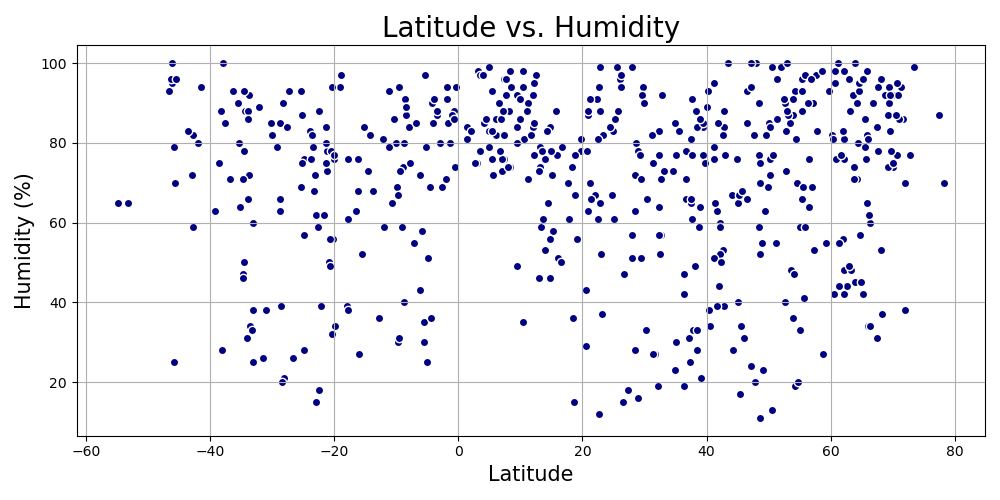

In [11]:
plt.figure(figsize=(10, 5))

plt.scatter(weatherDf['Latitude'], weatherDf['Humidity'], marker="o", facecolors="navy", edgecolors="white")

plt.title("Latitude vs. Humidity", fontsize=20)
plt.xlabel("Latitude", fontsize=15)
plt.ylabel("Humidity (%)", fontsize=15)
plt.grid()
plt.tight_layout()
plt.savefig("../output_data/Lat_vs_Humidity_Scatter.png")
plt.show()


## Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


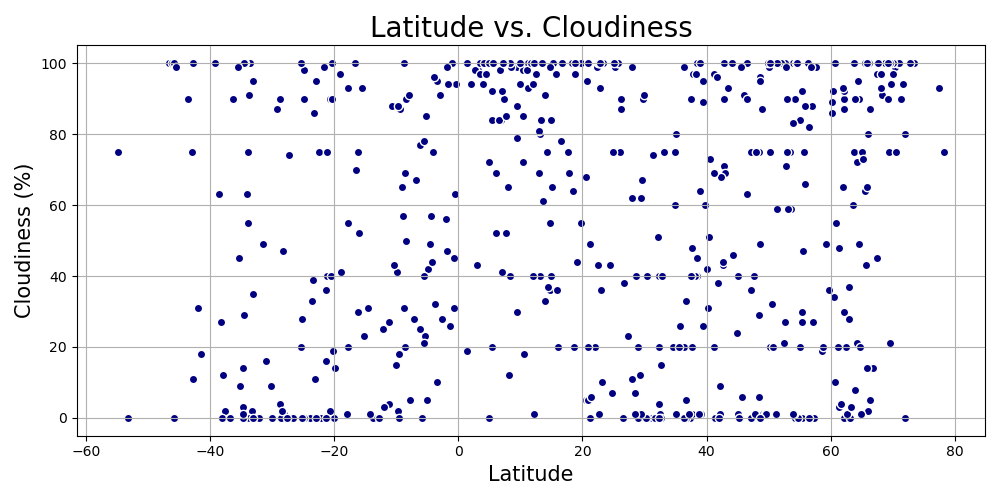

In [12]:
plt.figure(figsize=(10, 5))

plt.scatter(weatherDf['Latitude'], weatherDf['Cloudiness'], marker="o", facecolors="navy", edgecolors="white")

plt.title("Latitude vs. Cloudiness", fontsize=20)
plt.xlabel("Latitude", fontsize=15)
plt.ylabel("Cloudiness (%)", fontsize=15)
plt.grid()
plt.tight_layout()
plt.savefig("../output_data/Lat_vs_Cloudiness_Scatter.png")
plt.show()


## Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


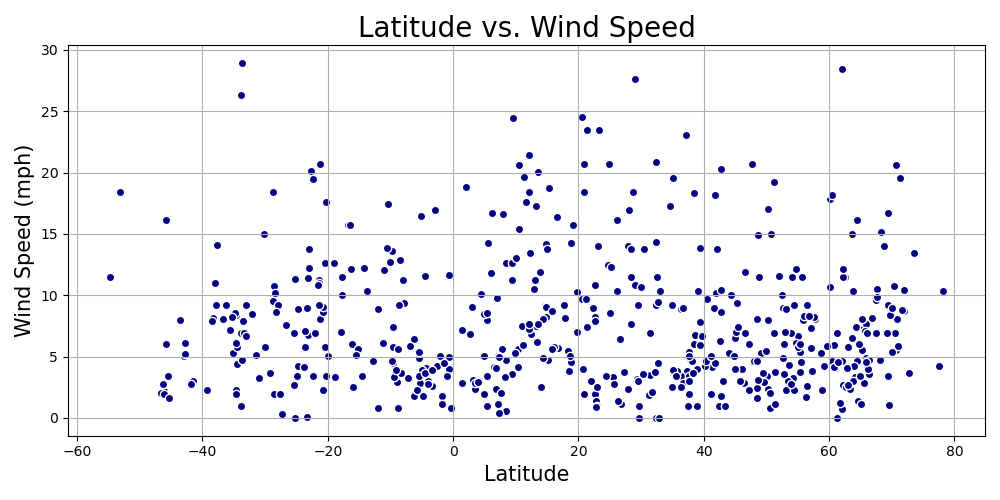

In [13]:
plt.figure(figsize=(10, 5))

plt.scatter(weatherDf['Latitude'], weatherDf['Wind_Speed'], marker="o", facecolors="navy", edgecolors="white")

plt.title("Latitude vs. Wind Speed", fontsize=20)
plt.xlabel("Latitude", fontsize=15)
plt.ylabel("Wind Speed (mph)", fontsize=15)
plt.grid()
plt.tight_layout()
plt.savefig("../output_data/Lat_vs_Wind_Speed_Scatter.png")
plt.show()

## Linear Regression

In [14]:
#Divide into North and South cities
maskNorth = weatherDf['Latitude'] >= 0
northDf = weatherDf[maskNorth].reset_index()
northDf.describe()

,index,Latitude,Longitude,Maximum_Temp,Humidity,Cloudiness,Wind_Speed,Date
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,3.830000e+02
mean,314.848564,38.892003,16.051281,71.523890,70.926893,58.274151,7.598616,1.627772e+09
std,175.373045,20.731400,88.573968,14.627007,21.996189,37.291417,5.507512,9.602298e+01
min,1.000000,1.445100,-179.166700,34.360000,11.000000,0.000000,0.000000,1.627772e+09
25%,170.000000,20.912850,-68.552950,60.620000,57.000000,20.000000,3.545000,1.627772e+09
50%,319.000000,40.129200,25.352300,74.190000,77.000000,69.000000,5.990000,1.627772e+09
75%,467.000000,56.105450,89.308650,82.015000,88.000000,95.000000,10.235000,1.627772e+09
max,607.000000,78.218600,178.416700,106.520000,100.000000,100.000000,28.430000,1.627772e+09


In [15]:
maskSouth = weatherDf['Latitude'] < 0
southDf = weatherDf[maskSouth].reset_index()
southDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         172 non-null    int64  
 1   City          172 non-null    object 
 2   Latitude      172 non-null    float64
 3   Longitude     172 non-null    float64
 4   Maximum_Temp  172 non-null    float64
 5   Humidity      172 non-null    float64
 6   Cloudiness    172 non-null    float64
 7   Wind_Speed    172 non-null    float64
 8   Country       172 non-null    object 
 9   Date          172 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 13.6+ KB


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


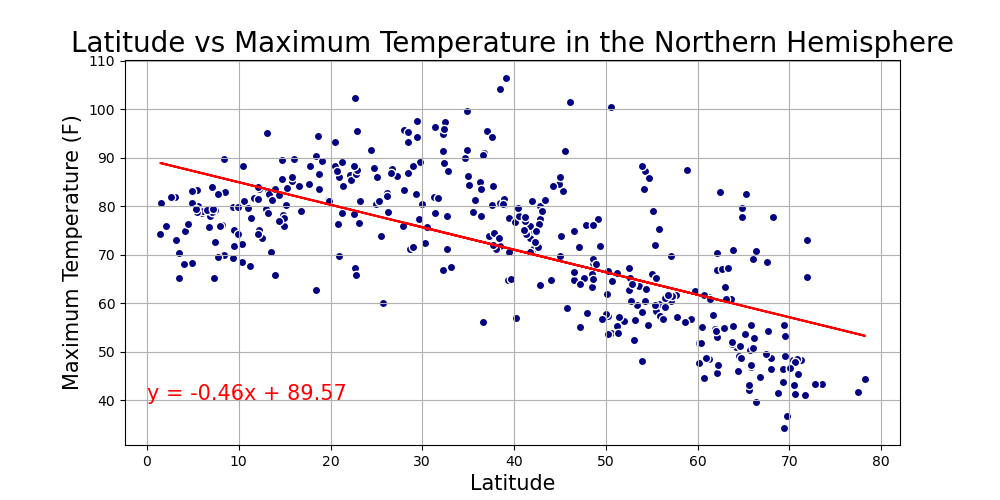

The r-squared is: 0.4324749070345746


In [16]:
x_values = northDf['Latitude']
y_values = northDf['Maximum_Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 5))
plt.scatter(x_values,y_values, marker="o", facecolors="navy", edgecolors="white")
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(0,40),fontsize=15,color="red")
plt.title('Latitude vs Maximum Temperature in the Northern Hemisphere', fontsize=20)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Maximum Temperature (F)', fontsize=15)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


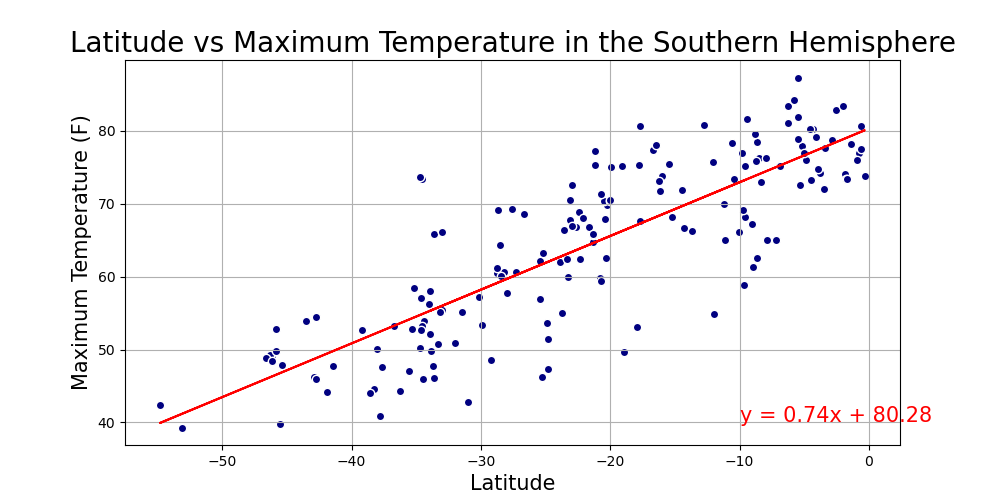

The r-squared is: 0.6908917995167722


In [17]:
x_values = southDf['Latitude']
y_values = southDf['Maximum_Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 5))
plt.scatter(x_values,y_values, marker="o", facecolors="navy", edgecolors="white")
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-10,40),fontsize=15,color="red")
plt.title('Latitude vs Maximum Temperature in the Southern Hemisphere', fontsize=20)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Maximum Temperature (F)', fontsize=15)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


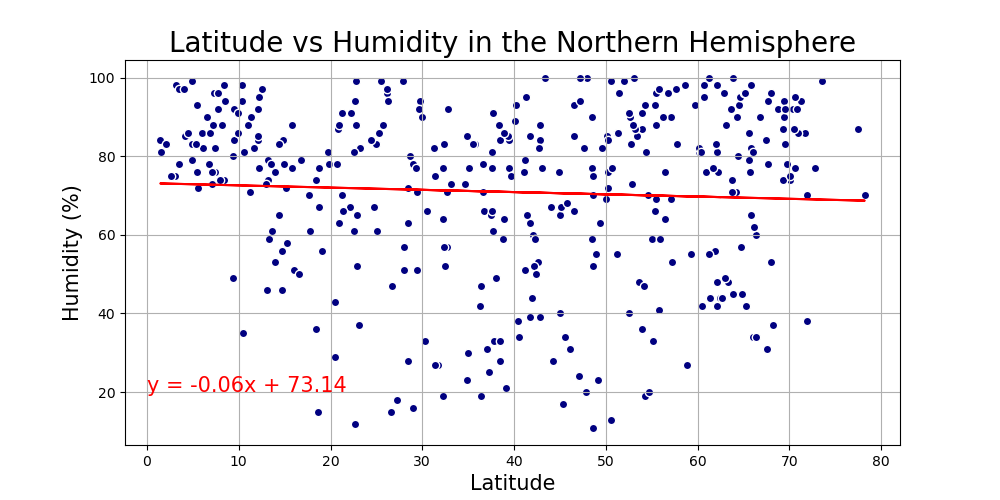

The r-squared is: 0.002877024212898362


In [18]:
x_values = northDf['Latitude']
y_values = northDf['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 5))
plt.scatter(x_values,y_values, marker="o", facecolors="navy", edgecolors="white")
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.title('Latitude vs Humidity in the Northern Hemisphere', fontsize=20)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Humidity (%)', fontsize=15)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


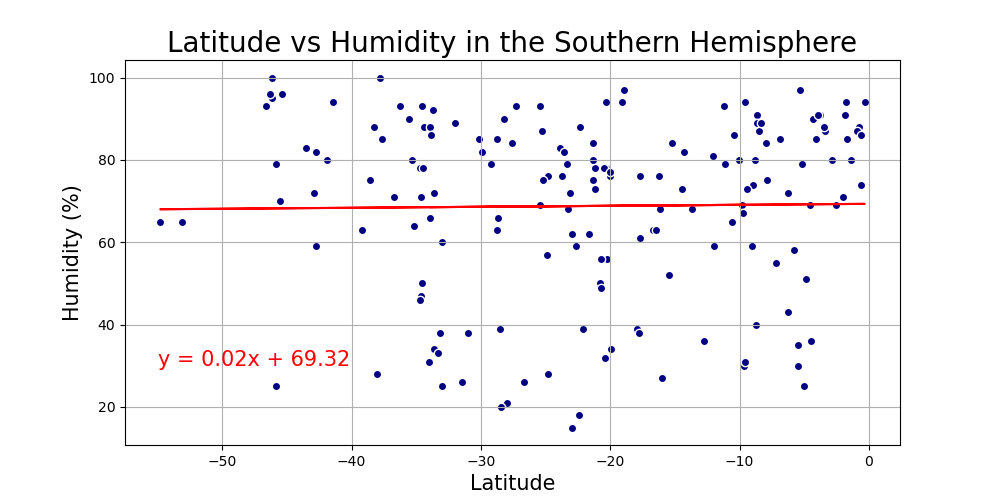

The r-squared is: 0.00021707412121068083


In [19]:
x_values = southDf['Latitude']
y_values = southDf['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 5))
plt.scatter(x_values,y_values, marker="o", facecolors="navy", edgecolors="white")
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-55,30),fontsize=15,color="red")
plt.title('Latitude vs Humidity in the Southern Hemisphere', fontsize=20)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Humidity (%)', fontsize=15)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


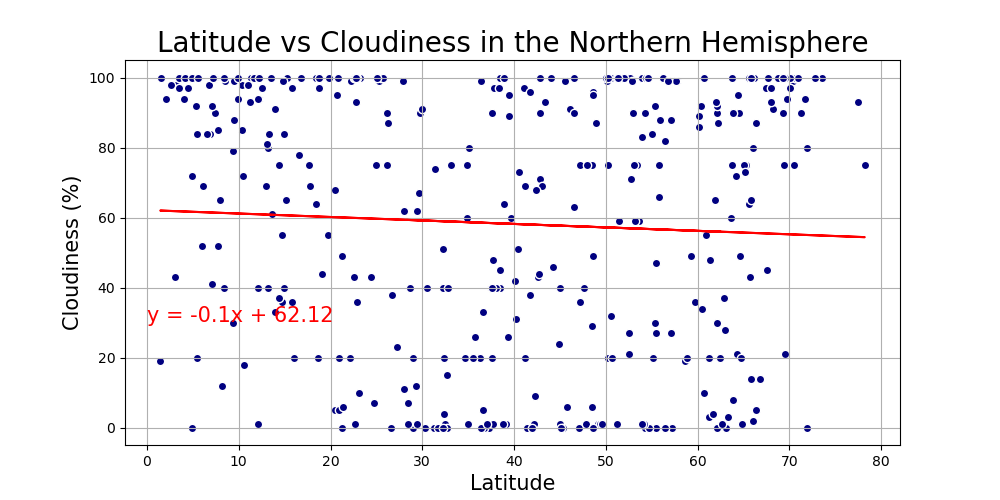

The r-squared is: 0.003023472788205608


In [20]:
x_values = northDf['Latitude']
y_values = northDf['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 5))
plt.scatter(x_values,y_values, marker="o", facecolors="navy", edgecolors="white")
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.title('Latitude vs Cloudiness in the Northern Hemisphere', fontsize=20)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Cloudiness (%)', fontsize=15)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


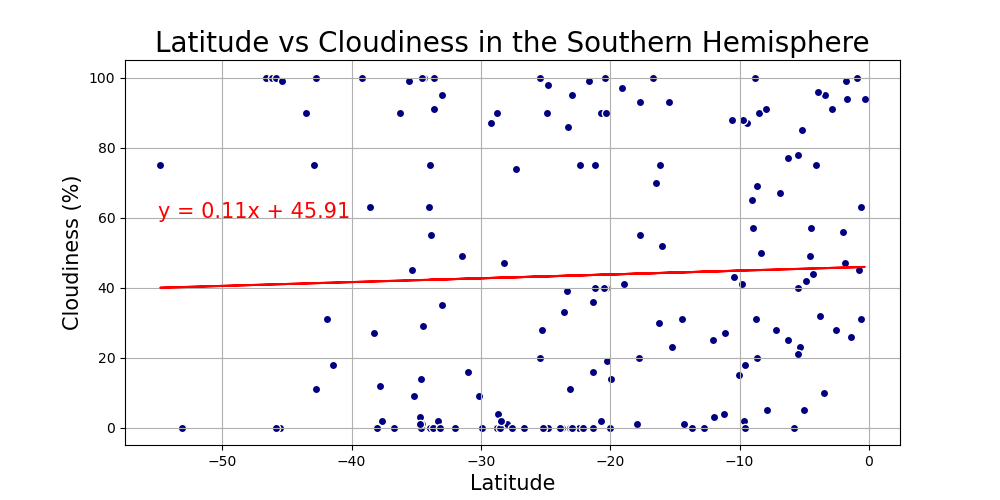

The r-squared is: 0.0014977066371961293


In [21]:
x_values = southDf['Latitude']
y_values = southDf['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 5))
plt.scatter(x_values,y_values, marker="o", facecolors="navy", edgecolors="white")
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-55,60),fontsize=15,color="red")
plt.title('Latitude vs Cloudiness in the Southern Hemisphere', fontsize=20)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Cloudiness (%)', fontsize=15)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


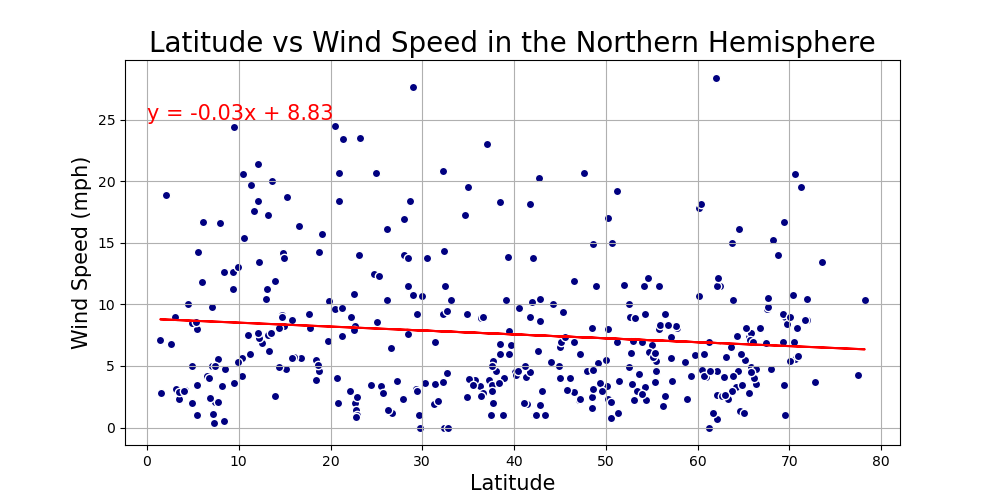

The r-squared is: 0.0142616263251425


In [22]:
x_values = northDf['Latitude']
y_values = northDf['Wind_Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 5))
plt.scatter(x_values,y_values, marker="o", facecolors="navy", edgecolors="white")
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.title('Latitude vs Wind Speed in the Northern Hemisphere', fontsize=20)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Wind Speed (mph)', fontsize=15)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


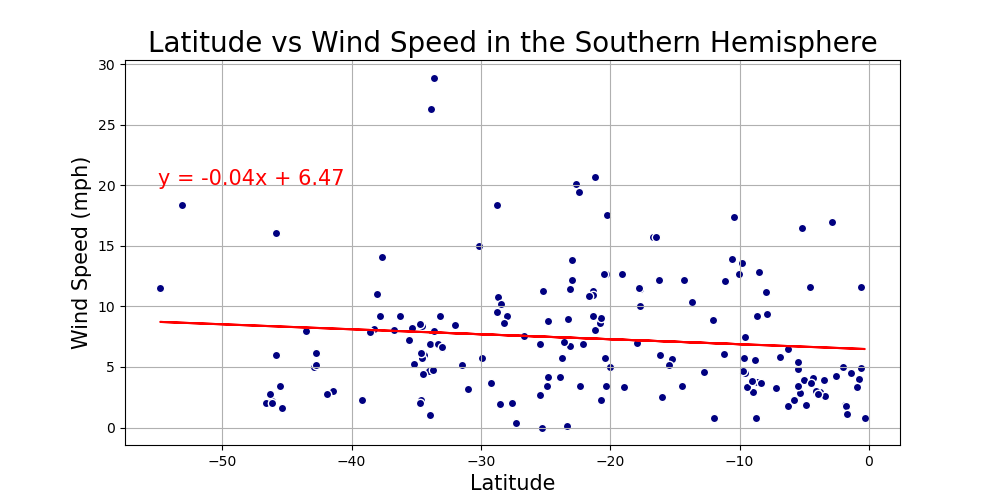

The r-squared is: 0.01166543004482635


In [23]:
x_values = southDf['Latitude']
y_values = southDf['Wind_Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 5))
plt.scatter(x_values,y_values, marker="o", facecolors="navy", edgecolors="white")
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.title('Latitude vs Wind Speed in the Southern Hemisphere', fontsize=20)
plt.xlabel('Latitude', fontsize=15)
plt.ylabel('Wind Speed (mph)', fontsize=15)
print(f"The r-squared is: {rvalue**2}")
plt.grid()
plt.show()